# Concerns:
- Where do I clean and lemmatize 

In [1]:
### Packages ###
import os
import re
import numpy as np
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer


# WebScrape

In [2]:
# SaveEnclylicals()

# Load Text

In [3]:
root_directory = "/Users/simondn/Documents/CSSS594/TextAnalysisVatican/Data/Encylicals"
df = LoadEncyclicals(root_directory)


In [4]:
df

,PopeName,encyclical,DocumentText,DocumentDate,PreVaticanII
0,leo_xiii,magni-nobis,"2. We, on our part, have not delayed to fulfil...",1889-03-07,True
1,leo_xiii,vi-e-ben-noto,2. It is easy to imagine what reasons We have ...,1887-09-20,True
2,leo_xiii,diuturnum,"2. For a long time, indeed, pains have been ta...",1881-06-29,True
3,leo_xiii,supremi-apostolatus-officio,2. It has always been the habit of Catholics i...,1883-09-01,True
4,leo_xiii,inimica-vis,2. Our predecessors in the Roman pontificate h...,1892-12-08,True
...,...,...,...,...,...
210,pius_xii,redemptoris-nostri-cruciatus,"1. The passion of Our Redeemer, rendered prese...",1949-04-15,True
211,pius_xii,sempiternus-rex-christus,"Given at St. Peter's Basilica, Rome, on the 8t...",1951-09-08,True
212,pius_xii,sacra-virginitas,1. Holy virginity and that perfect chastity wh...,1954-03-25,True
213,pius_xii,le-pelerinage-de-lourdes,"2. We are particularly pleased, therefore, to ...",1957-07-02,True


# Word Frequency

In [5]:
### Stop Words ###
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('stopwords')
nltk.download('punkt')
CustomStopWords = {"would", "which"}  # Add any other words you want here
StopWordsSet = set(stopwords.words("english")).union(STOPWORDS, CustomStopWords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
### Get word frequency per pope ###
PopeEncyWordFrequency = GetEncylicalWordFrequency(df_input = df, GroupByVar = "PopeName", stop_words = None, TopNInput = 20)

### Get word frequency for popes before Vatican II and after Vatican II ###
CouncilEncyWordFrequency = GetEncylicalWordFrequency(df_input = df, GroupByVar = "PreVaticanII", stop_words = None, TopNInput = 20)
CouncilEncyWordFrequency.columns = ["Pre_VaticanII", "Post_VaticanII"]

In [7]:
CouncilEncyWordFrequency

,Pre_VaticanII,Post_VaticanII
which,16.337396,16.232267
their,10.969332,6.950401
church,8.905707,6.675465
those,5.799270,4.212031
christ,5.412065,5.685692
these,5.046861,3.420213
should,4.743257,0.000000
catholic,4.347252,0.000000
faith,4.127250,6.840427
christian,3.942447,3.156274


# Text Comparison

## Pre/Post Vatican II

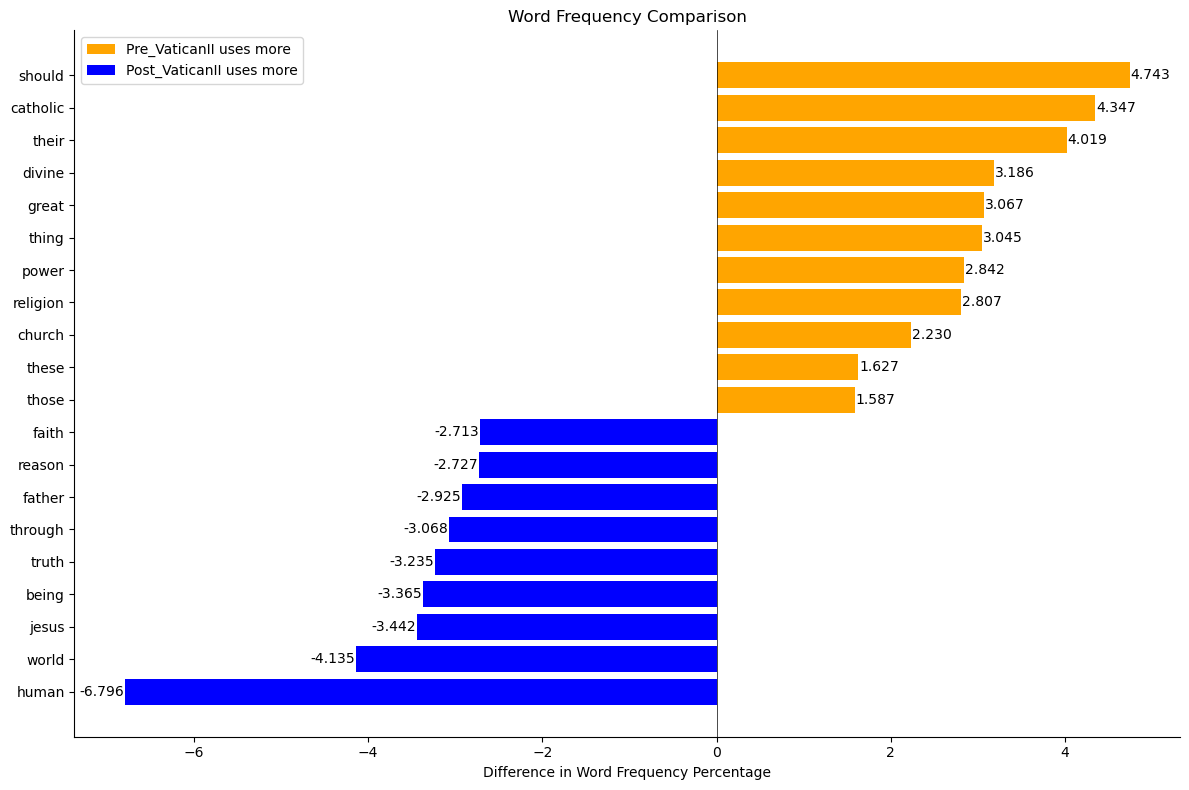

In [8]:
fig, ax = DivergingBarChartFunction(CouncilEncyWordFrequency, "Pre_VaticanII", "Post_VaticanII", NWords=20)


## Between Popes

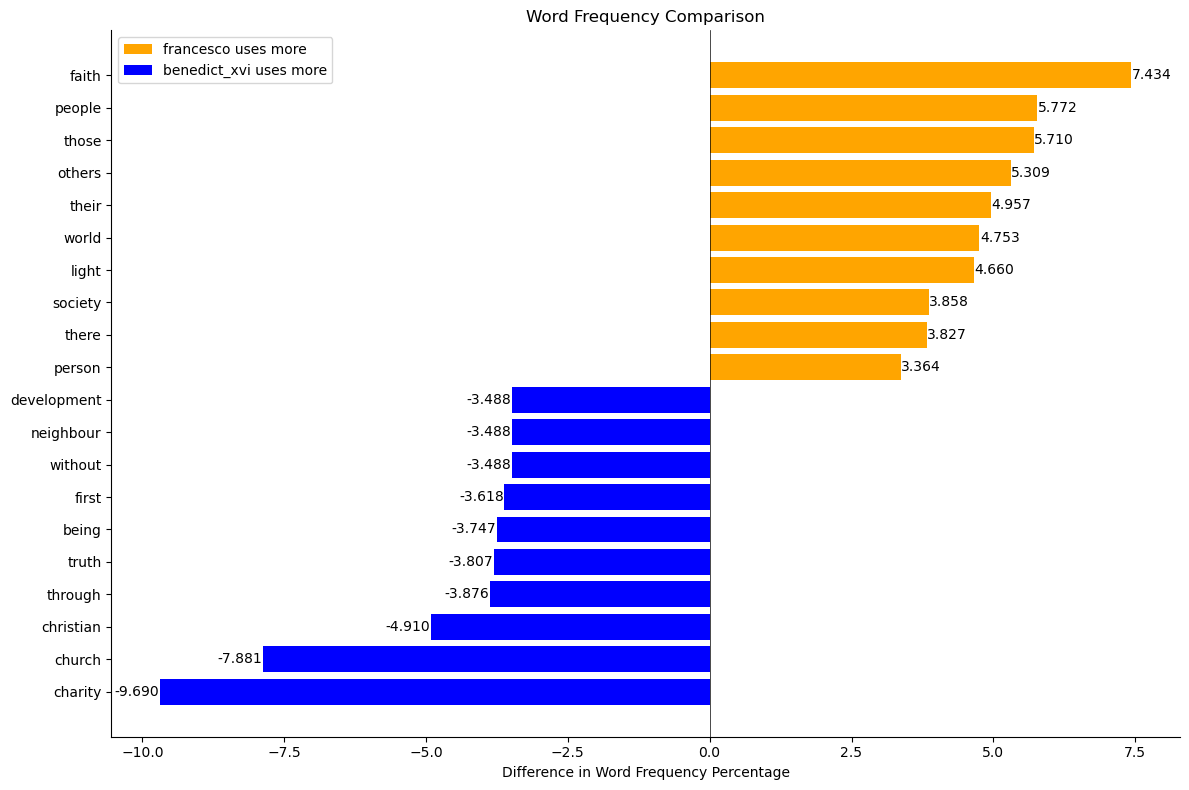

In [9]:
fig, ax = DivergingBarChartFunction(PopeEncyWordFrequency, "francesco", "benedict_xvi", NWords=20)


# Sentiment Analysis

In [10]:
EncyclicalSentimentsDF = GetEncylicalSentiments(df)

In [11]:
EncyclicalSentimentsDF

,DocumentTitle,DocumentDate,PopeName,PreVaticanII,NegativeScore,NeutralScore,PositiveScore,CompoundScore
70,inscrutabili-dei-consilio,1878-04-21,leo_xiii,True,0.103,0.706,0.191,0.9997
34,quod-apostolici-muneris,1878-12-28,leo_xiii,True,0.155,0.673,0.173,0.7850
22,aeterni-patris,1879-08-04,leo_xiii,True,0.061,0.697,0.242,1.0000
49,arcanum,1880-02-10,leo_xiii,True,0.080,0.749,0.172,1.0000
16,grande-munus,1880-09-30,leo_xiii,True,0.000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
166,caritas-in-veritate,2009-06-29,benedict_xvi,False,0.031,0.696,0.272,1.0000
139,lumen-fidei,2013-06-29,francesco,False,0.034,0.713,0.253,1.0000
137,laudato-si,2015-05-24,francesco,False,0.141,0.780,0.079,-0.9446
138,fratelli-tutti,2020-10-03,francesco,False,0.118,0.690,0.193,1.0000


In [12]:
# Extract the unique years from the 'DocumentDate' column
unique_years = EncyclicalSentimentsDF['DocumentDate'].dt.year.unique()

# Display the unique years
print(unique_years)


[1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1909 1910 1911 1912 1914 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1928 1929 1930 1931 1932 1933 1935 1936 1937 1939 1940
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1953 1954 1955 1956 1957
 1958 1959 1961 1962 1963 1964 1965 1966 1967 1968 1979 1980 1981 1985
 1986 1987 1990 1991 1993 1995 1998 2003 2005 2007 2009 2013 2015 2020
 2024]


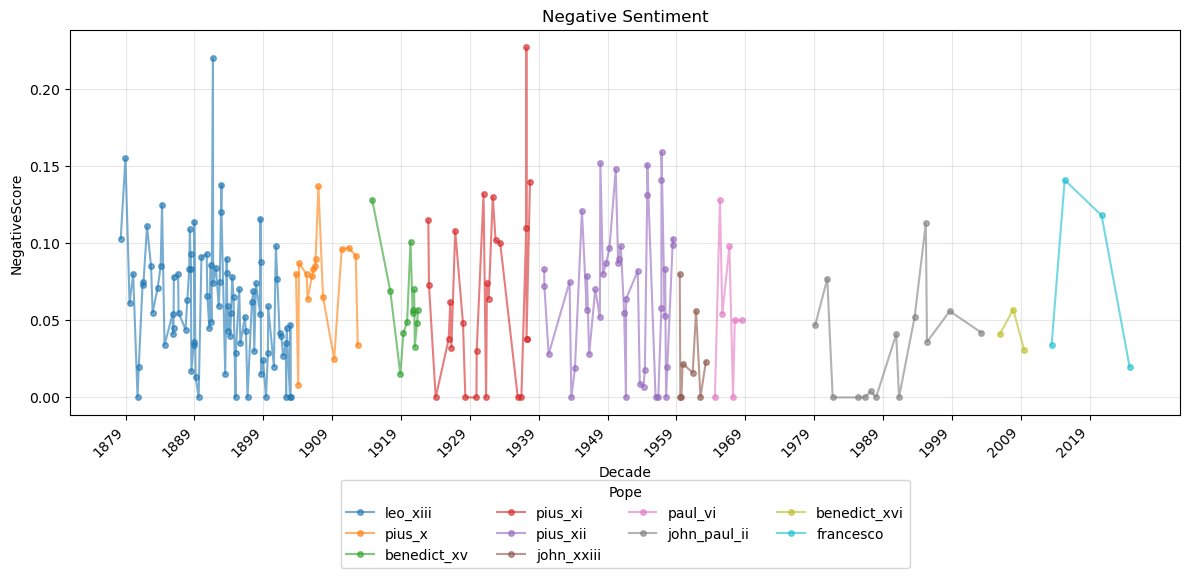

In [13]:
PlotSentimentScores(EncyclicalSentimentsDF, "NegativeScore")


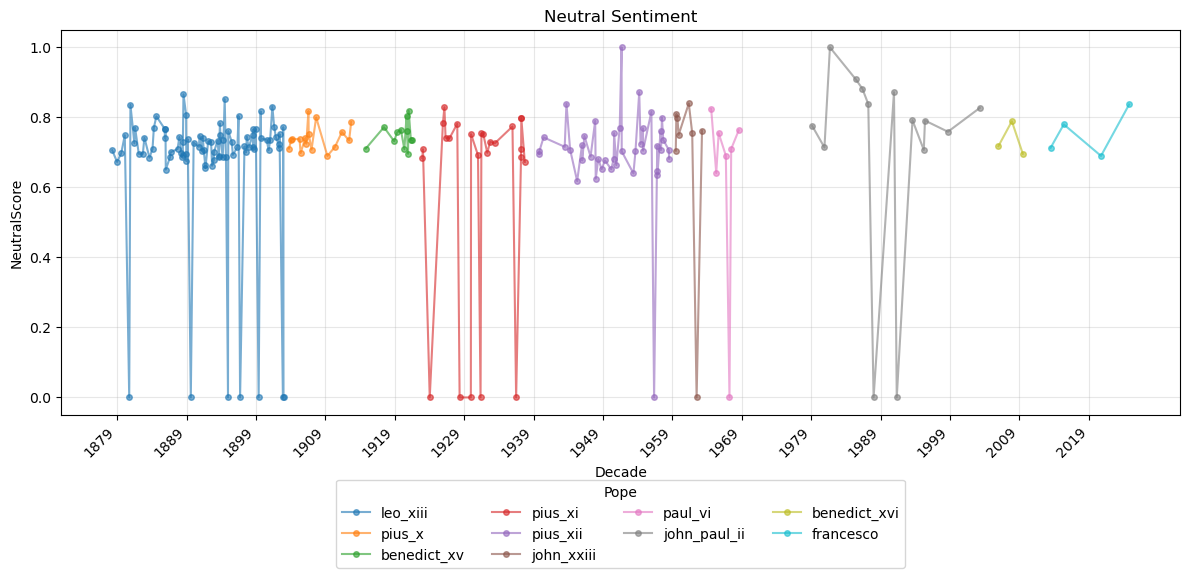

In [14]:
PlotSentimentScores(EncyclicalSentimentsDF, "NeutralScore")


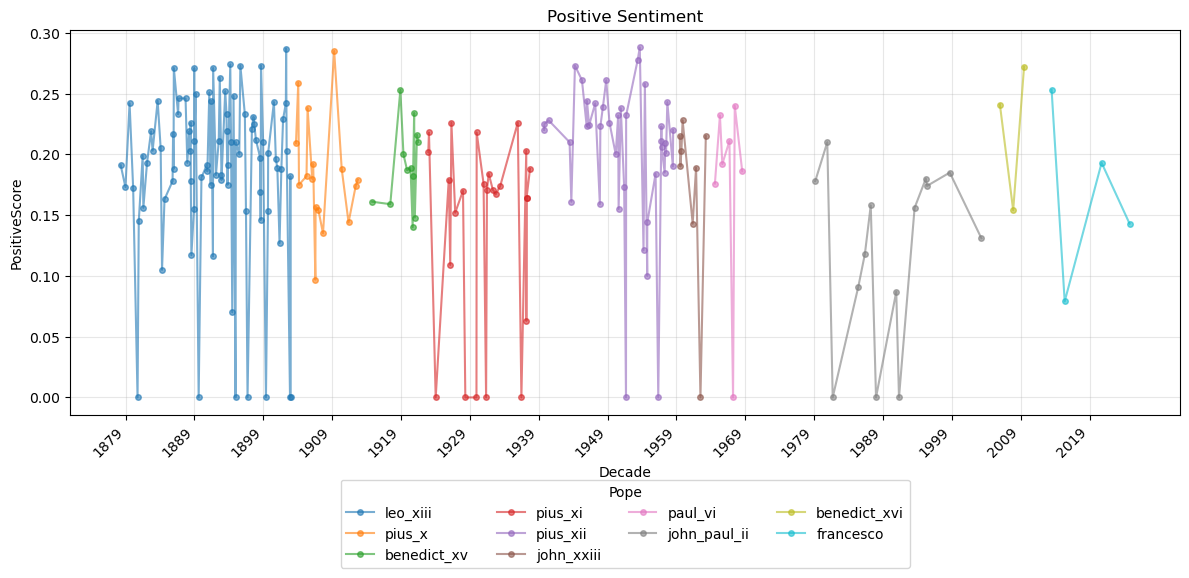

In [15]:
PlotSentimentScores(EncyclicalSentimentsDF, "PositiveScore")


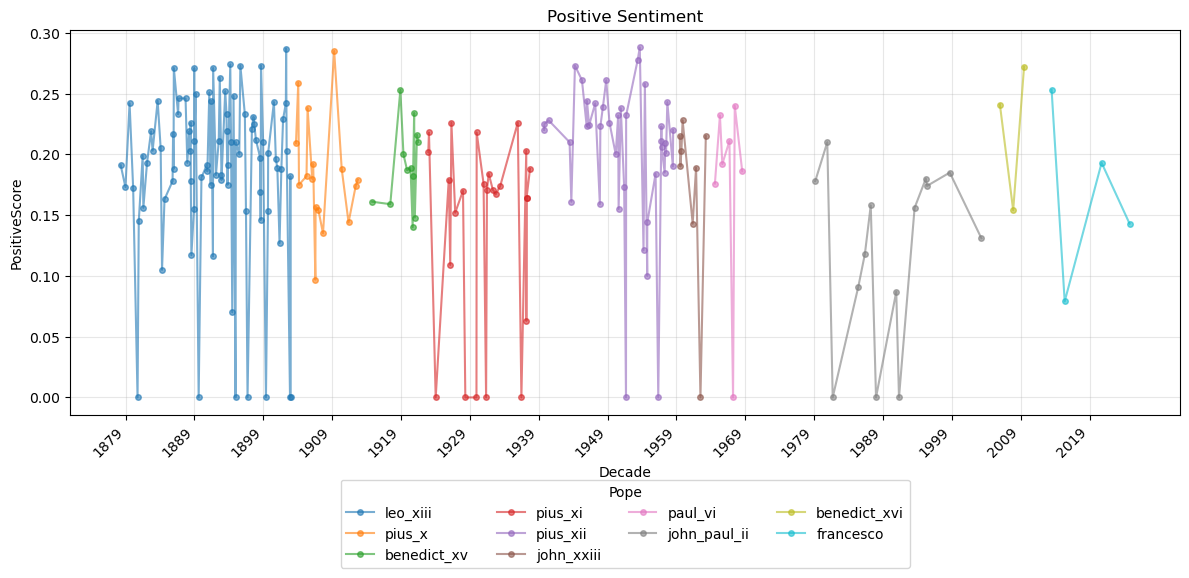

In [16]:
PlotSentimentScores(EncyclicalSentimentsDF, "PositiveScore")
